#### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

#### Model definition

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 46ms/step - loss: 0.5190 - accuracy: 0.7671 - val_loss: 0.4252 - val_accuracy: 0.8322
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3020 - accuracy: 0.9041 - val_loss: 0.2981 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2161 - accuracy: 0.9305 - val_loss: 0.3223 - val_accuracy: 0.8686
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1731 - accuracy: 0.9415 - val_loss: 0.2894 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1402 - accuracy: 0.9555 - val_loss: 0.2874 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1157 - accuracy: 0.9641 - val_loss: 0.3041 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0958 - accuracy: 0.9706 - val_loss: 0.3628 - val_accuracy: 0.8709
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

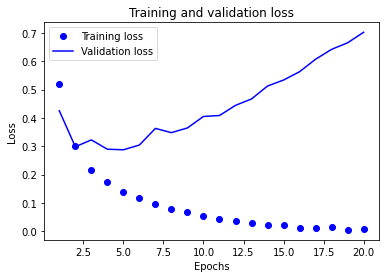

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

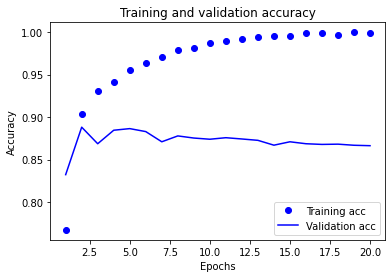

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Retraining a model from scratch

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4662 - accuracy: 0.8178
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2718 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2070 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2951 - accuracy: 0.8830


### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test)

array([[0.15058434],
       [0.9991961 ],
       [0.8486499 ],
       ...,
       [0.09139372],
       [0.0677928 ],
       [0.40162584]], dtype=float32)

## PART 2 - Multiclass classification of newswires using the Reuters dataset


### The Reuters dataset

#### Loading the Reuters dataset

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [24]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.5979 - accuracy: 0.5241 - val_loss: 1.7354 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4258 - accuracy: 0.6992 - val_loss: 1.3230 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0624 - accuracy: 0.7761 - val_loss: 1.1467 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8414 - accuracy: 0.8247 - val_loss: 1.0615 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6713 - accuracy: 0.8559 - val_loss: 0.9745 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5340 - accuracy: 0.8859 - val_loss: 0.9291 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4299 - accuracy: 0.9110 - val_loss: 0.9305 - val_accuracy: 0.8070
Epoch 8/20
16

#### Plotting the training and validation loss

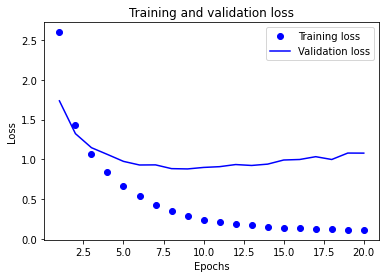

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

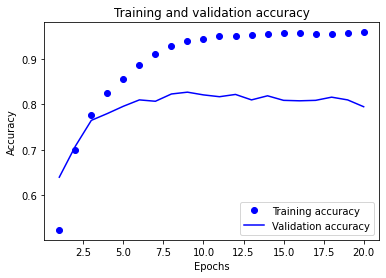

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Retraining a model from scratch

In [34]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5328 - accuracy: 0.5355
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3583 - accuracy: 0.7147
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0042 - accuracy: 0.7812
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7889 - accuracy: 0.8307
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6242 - accuracy: 0.8696
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4958 - accuracy: 0.8978
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3980 - accuracy: 0.9148
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3238 - accuracy: 0.9279
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9733 - accuracy: 0.7894


In [35]:
results

[0.9732527732849121, 0.7894033789634705]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18521816562778273

### Generating predictions on new data

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[0].shape

(46,)

In [39]:
np.sum(predictions[0])

0.9999998

In [40]:
np.argmax(predictions[0])

3